In [1]:
from pepbenchmark.single_pred.base_dataset import SingleTaskDatasetManager,OFFICIAL_FEATURE_TYPES
from pepbenchmark.utils.logging import disable_logging,enable_logging

# 读取数据集

In [2]:
# when you want to disable logging, uncomment the line below
enable_logging()
# disable_logging()



In [3]:



# Example usage of SingleTaskDatasetManager
# 导入数据集AV_APML 并加载fasta和label特征
# 导入的特征必须在OFFICIAL_FEATURE_TYPES中
# 默认情况下，数据集会被下载到默认目录 DATA_DIR

dataset = SingleTaskDatasetManager(
    dataset_name="AV_APML",
    official_feature_names=["fasta","label"],
    force_download=False,
)
# 支持的所有官方特征
print("Supported official features:", OFFICIAL_FEATURE_TYPES)

[2025-07-02 17:51:12,572][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-07-02 17:51:12,573][INFO][pepbenchmark] Set official feature: label successfully


Supported official features: {'fasta', 'label', 'mmseqs2_split', 'fasta_esm2_150', 'fasta_onehot', 'smiles', 'ecfp', 'graph', 'ramdom_split', 'helm', 'biln'}


In [4]:
print(len(dataset))  # 打印数据集的长度

4796


In [5]:

print(dataset[0]) # 打印数据集的第一个样本


{'official_fasta': 'SCVSQSTGQIQCKVFDSLLNLSSTLQAT', 'official_label': 1}


In [6]:
# 继续添加新的官方特征,这等价于初始化SingleTaskDatasetManager时在official_feature_names中指定
dataset.set_official_feature(feature_name="smiles")
print(dataset[0])
# 添加已经存在的特征
dataset.set_official_feature(feature_name="fasta")
print(dataset[0])
# 添加不存在于官方的用户自定义特征;feature_data的长度和顺序需要与已加载特征匹配
user_feature_data = [len(dataset[i]["official_fasta"]) for i in range(len(dataset))]
dataset.set_user_feature(feature_name="custom_feature", feature_data=user_feature_data)
print(dataset[0])
print(dataset.get_feature_names())  # 打印所有特征名称

# 删除特征
dataset.remove_official_feature(feature_name="smiles")
print(dataset.get_feature_names())  # 打印所有特征名称

[2025-07-02 17:51:14,468][INFO][pepbenchmark] Set official feature: smiles successfully
[2025-07-02 17:51:14,469][INFO][pepbenchmark] Feature fasta already exists in dataset


[2025-07-02 17:51:14,494][INFO][pepbenchmark] Set user feature: custom_feature successfully
[2025-07-02 17:51:14,494][INFO][pepbenchmark] Removed official feature: smiles


{'official_fasta': 'SCVSQSTGQIQCKVFDSLLNLSSTLQAT', 'official_label': 1, 'official_smiles': 'CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@H](CS)NC(=O)[C@@H](N)CO)C(C)C)[C@@H](C)O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CS)C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)O)[C@@H](C)O)[C@@H](C)O)C(C)C'}
{'official_fasta': 'SCVSQSTGQIQCKVFDSLLNLSSTLQAT', 'official_label': 1, 'official_smiles': 'CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)CNC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@H](CS)NC(=O)[C@@H](N)CO)C(C)C)[C@@H](C)O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CS)C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CC(=O)O)C

## Featurization

In [7]:
from pepbenchmark.pep_utils.featurizer import PeptideFeaturizer
fp_featurizer = PeptideFeaturizer("smiles", "fingerprint", {"fp_type": "Morgan", "radius": 2})
result = fp_featurizer("CC(=O)OC1=CC=CC=C1C(=O)O")
print(result)


INFO:rdkit:Enabling RDKit 2025.03.3 jupyter extensions


[2025-07-02 17:51:16,349][INFO][pepbenchmark] Successfully instantiated Smiles2FP with parameters: {'fp_type': 'Morgan', 'radius': 2}


[0 0 0 ... 0 0 0]


[17:51:16] DEPRECATION WARNING: please use MorganGenerator


## User defined features and split indices

In [8]:
import pandas as pd
from pepbenchmark.single_pred.base_dataset import SingleTaskDatasetManager
from pepbenchmark.utils.logging import disable_logging,enable_logging
from pepbenchmark.pep_utils.featurizer import PeptideFeaturizer
from pepbenchmark.splitter.random_spliter import RandomSplitter
import warnings
warnings.filterwarnings("ignore")

enable_logging()
dataset = SingleTaskDatasetManager(
    dataset_name="QS_APML",
    official_feature_names=["fasta","label"],
    dataset_dir = "E:\pycharm\peptide_data\Theraputic-Other\QS_APML")
fasta = dataset.get_official_feature("fasta")
helm_converter = PeptideFeaturizer("fasta", "helm")
smi_converter = PeptideFeaturizer("fasta", "smiles")
smiles = smi_converter(fasta)
fp_featurizer = PeptideFeaturizer("smiles", "fingerprint", {"fp_type": "Morgan", "radius": 2})
helm = helm_converter(fasta)
fp = fp_featurizer(smiles)

dataset.set_user_feature("helm", helm)
dataset.set_user_feature("fingerprint", fp)

spliter = RandomSplitter()
split_indices = spliter.get_split_indices(fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        seed=42,
                                    )

dataset.set_user_split_indices(split_indices)

# Get train, valid, test features
train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
train_df = pd.DataFrame(train_features)
train_df.head()

INFO:pepbenchmark.metadata:Dataset directory: C:\Users\wangr/.pepbenchmark_cache/data_share/peptide_dataset/processed_2025.6.12v/
INFO:rdkit:Enabling RDKit 2025.03.3 jupyter extensions
[2025-06-29 20:40:12,672][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-06-29 20:40:12,674][INFO][pepbenchmark] Set official feature: label successfully
[2025-06-29 20:40:12,675][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-29 20:40:12,676][INFO][pepbenchmark] Successfully instantiated Fasta2Helm with parameters: {}
[2025-06-29 20:40:12,676][INFO][pepbenchmark] Successfully instantiated Fasta2Smiles with parameters: {}
[2025-06-29 20:40:12,949][INFO][pepbenchmark] Successfully instantiated Smiles2FP with parameters: {'fp_type': 'Morgan', 'radius': 2}
[20:40:12] DEPRECATION WARNING: please use MorganGenerator
[20:40:12] DEPRECATION WARNING: please use MorganGenerator
[20:40:12] DEPRECATION WARNING: please use MorganGenerator
[20:40:12] DEPRECATION WARNI

,official_fasta,official_label,user_helm,user_fingerprint
395,EMRLSKFFRDFILQRKK,1,PEPTIDE1{E.M.R.L.S.K.F.F.R.D.F.I.L.Q.R.K.K}$$$...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
78,DILIIVGG,1,PEPTIDE1{D.I.L.I.I.V.G.G}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
278,VEYHFLSPYVSPRE,0,PEPTIDE1{V.E.Y.H.F.L.S.P.Y.V.S.P.R.E}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
305,APTLWARMI,0,PEPTIDE1{A.P.T.L.W.A.R.M.I}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
325,EIRQTHNIFFNFFKRR,1,PEPTIDE1{E.I.R.Q.T.H.N.I.F.F.N.F.F.K.R.R}$$$V2.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Redundancy filter and homo-based split

In [10]:
import pandas as pd
from pepbenchmark.single_pred.base_dataset import SingleTaskDatasetManager
from pepbenchmark.splitter.homo_spliter import MMseqs2Spliter
from pepbenchmark.pep_utils.redundancy import RedundancyFilter
from pepbenchmark.utils.logging import disable_logging,enable_logging

enable_logging()

dataset = SingleTaskDatasetManager(
    dataset_name="QS_APML",
    official_feature_names=["fasta","label"],
    dataset_dir = "E:\pycharm\peptide_data\QS_APML",
    force_download = False)
fasta = dataset.get_official_feature("fasta")
label = dataset.get_official_feature("label")
print(len(fasta))
fitter = RedundancyFilter(identity=0.3)
remain_index = fitter(fasta, label)
dataset.set_remain_feature(remain_index)
remain_fasta = dataset.get_official_feature("fasta")
print(len(remain_fasta))
print(remain_index)

spliter = MMseqs2Spliter()
split_indices = spliter.get_split_indices(remain_fasta,
                                        n_splits=5,
                                        frac_train=0.8,
                                        frac_valid=0.1,
                                        frac_test=0.1,
                                        identity=0.25,
                                        seed=42,
                                    )
print(split_indices)
dataset.set_user_split_indices(split_indices)

train_features, valid_features, test_features = dataset.get_train_val_test_features(format="dict")
train_df = pd.DataFrame(train_features)
train_df.head()


[2025-06-29 22:15:30,587][INFO][pepbenchmark] Set official feature: fasta successfully
[2025-06-29 22:15:30,590][INFO][pepbenchmark] Set official feature: label successfully
[2025-06-29 22:15:30,591][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-29 22:15:30,591][INFO][pepbenchmark] Feature label already loaded, skipping download


436


[2025-06-29 22:15:46,250][INFO][pepbenchmark] Redundancy filter: 0.88 of the original data remains
[2025-06-29 22:15:46,252][INFO][pepbenchmark] Set remain feature successfully
[2025-06-29 22:15:46,253][INFO][pepbenchmark] Feature fasta already loaded, skipping download


384
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 22

[2025-06-29 22:15:53,807][INFO][pepbenchmark] Total clusters: 382
Cluster size distribution:
  size = 1: 380 clusters
  size 2–4: 2 clusters
  size 5–9: 0 clusters
  size 10–19: 0 clusters
  size 20+: 0 clusters

[2025-06-29 22:15:53,892][INFO][pepbenchmark] Finish clustering and splitting data.
                    
Target train data size: 307, Train: 307
                    
Target valid data size：38， Valid: 38
                    
Target test data size：38, Test: 39
[2025-06-29 22:15:53,893][INFO][pepbenchmark] Set user-defined split indices successfully


{'train': [312, 22, 211, 291, 285, 135, 315, 330, 231, 53, 262, 75, 209, 96, 202, 367, 14, 134, 358, 309, 220, 124, 313, 41, 122, 253, 173, 340, 25, 213, 138, 59, 163, 223, 300, 71, 176, 348, 357, 1, 351, 298, 11, 206, 364, 346, 251, 191, 328, 317, 219, 31, 258, 353, 331, 376, 306, 63, 185, 16, 316, 373, 159, 87, 161, 20, 325, 267, 8, 121, 218, 45, 10, 111, 126, 276, 136, 47, 67, 243, 73, 244, 167, 247, 182, 70, 36, 114, 127, 128, 164, 154, 222, 54, 249, 250, 246, 260, 68, 297, 271, 38, 103, 32, 30, 255, 56, 48, 117, 269, 170, 186, 303, 27, 82, 132, 13, 140, 180, 46, 85, 341, 359, 321, 24, 196, 143, 225, 107, 208, 198, 256, 366, 230, 28, 248, 338, 6, 273, 381, 234, 110, 217, 152, 119, 345, 144, 361, 319, 177, 52, 241, 344, 174, 65, 296, 370, 237, 3, 9, 318, 235, 137, 109, 192, 169, 371, 286, 378, 60, 141, 203, 254, 133, 102, 227, 257, 129, 299, 205, 215, 200, 99, 145, 131, 327, 160, 240, 354, 130, 337, 194, 44, 92, 377, 294, 304, 274, 266, 112, 311, 277, 43, 293, 39, 120, 101, 15, 86, 

,official_fasta,official_label
312,ENLHLPLPLL,0
22,KCVLVTL,1
211,ALATAAAAV,0
291,CDFIM,1
285,STCAFIM,1


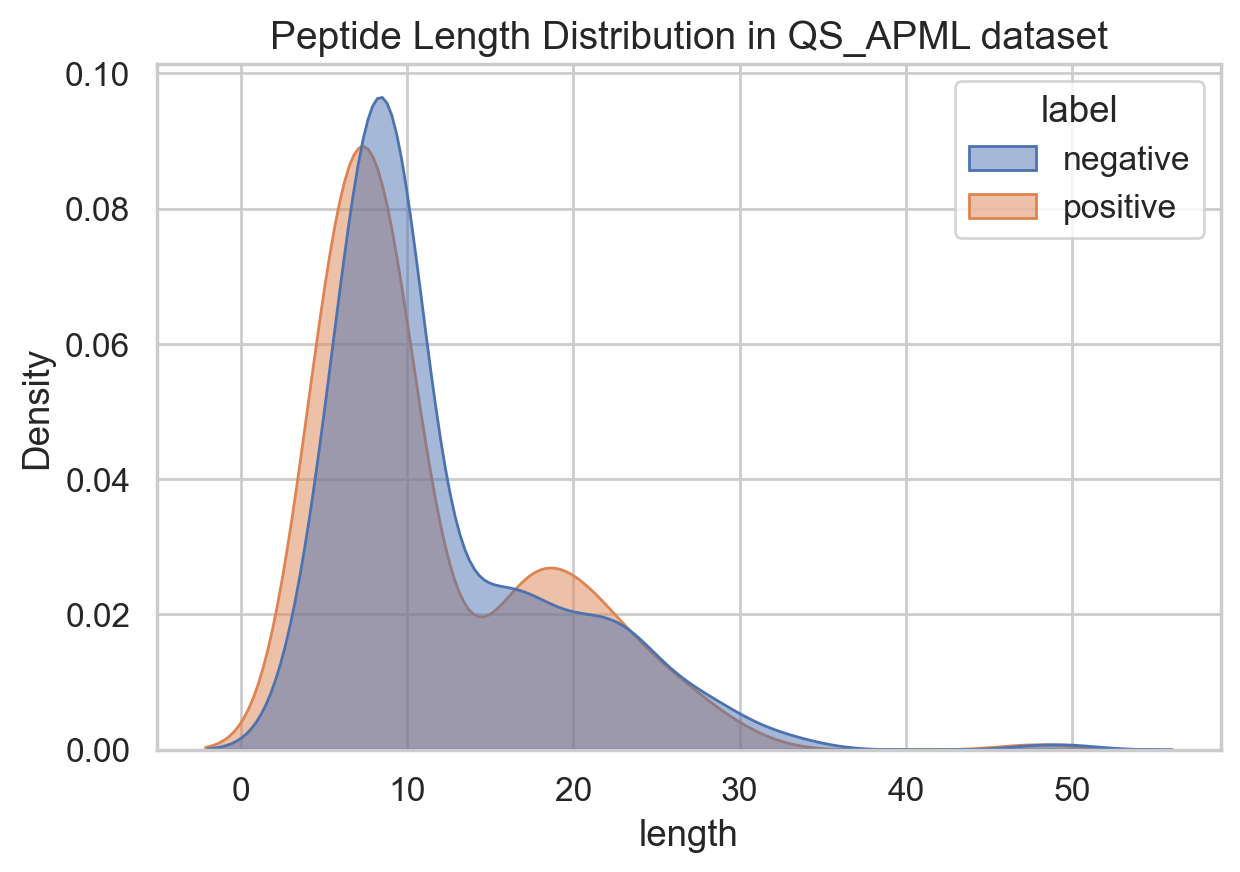

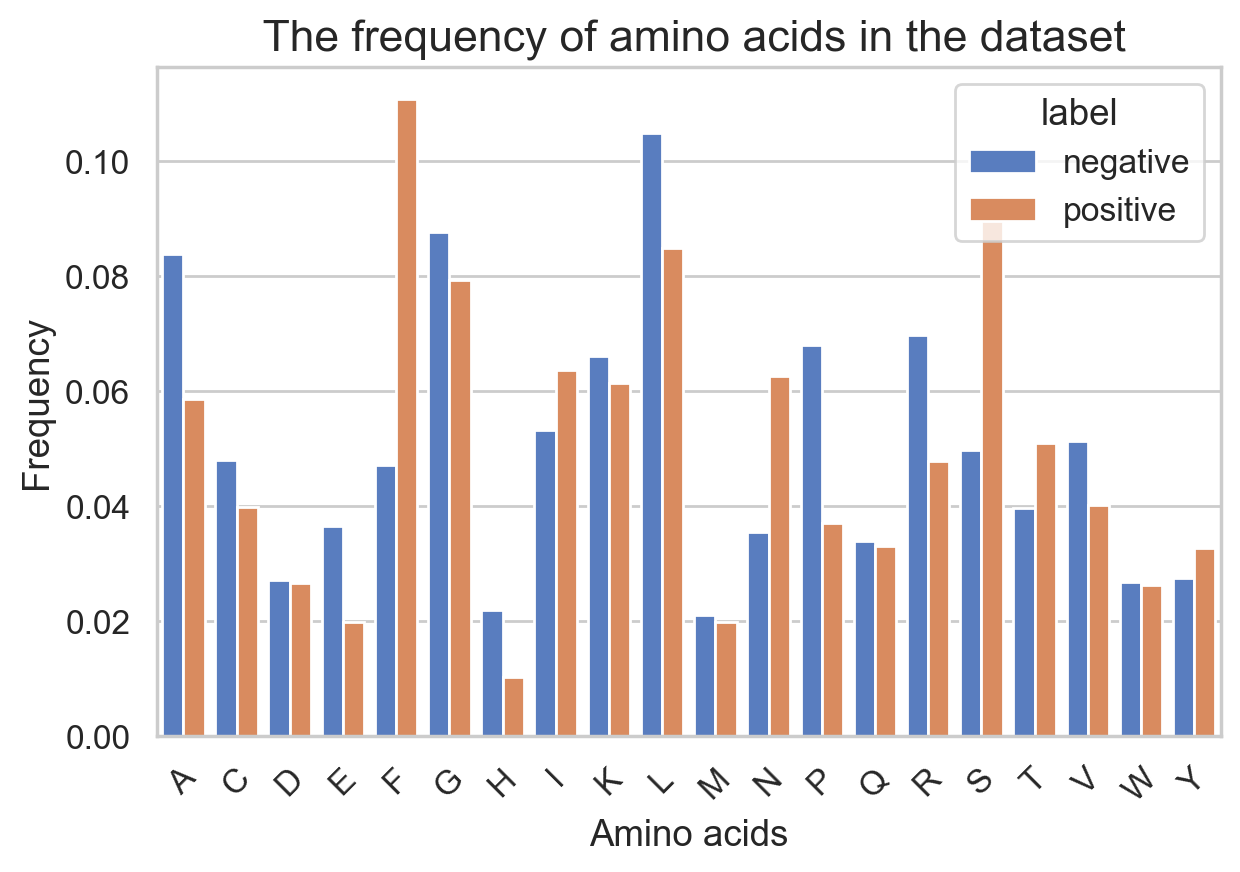

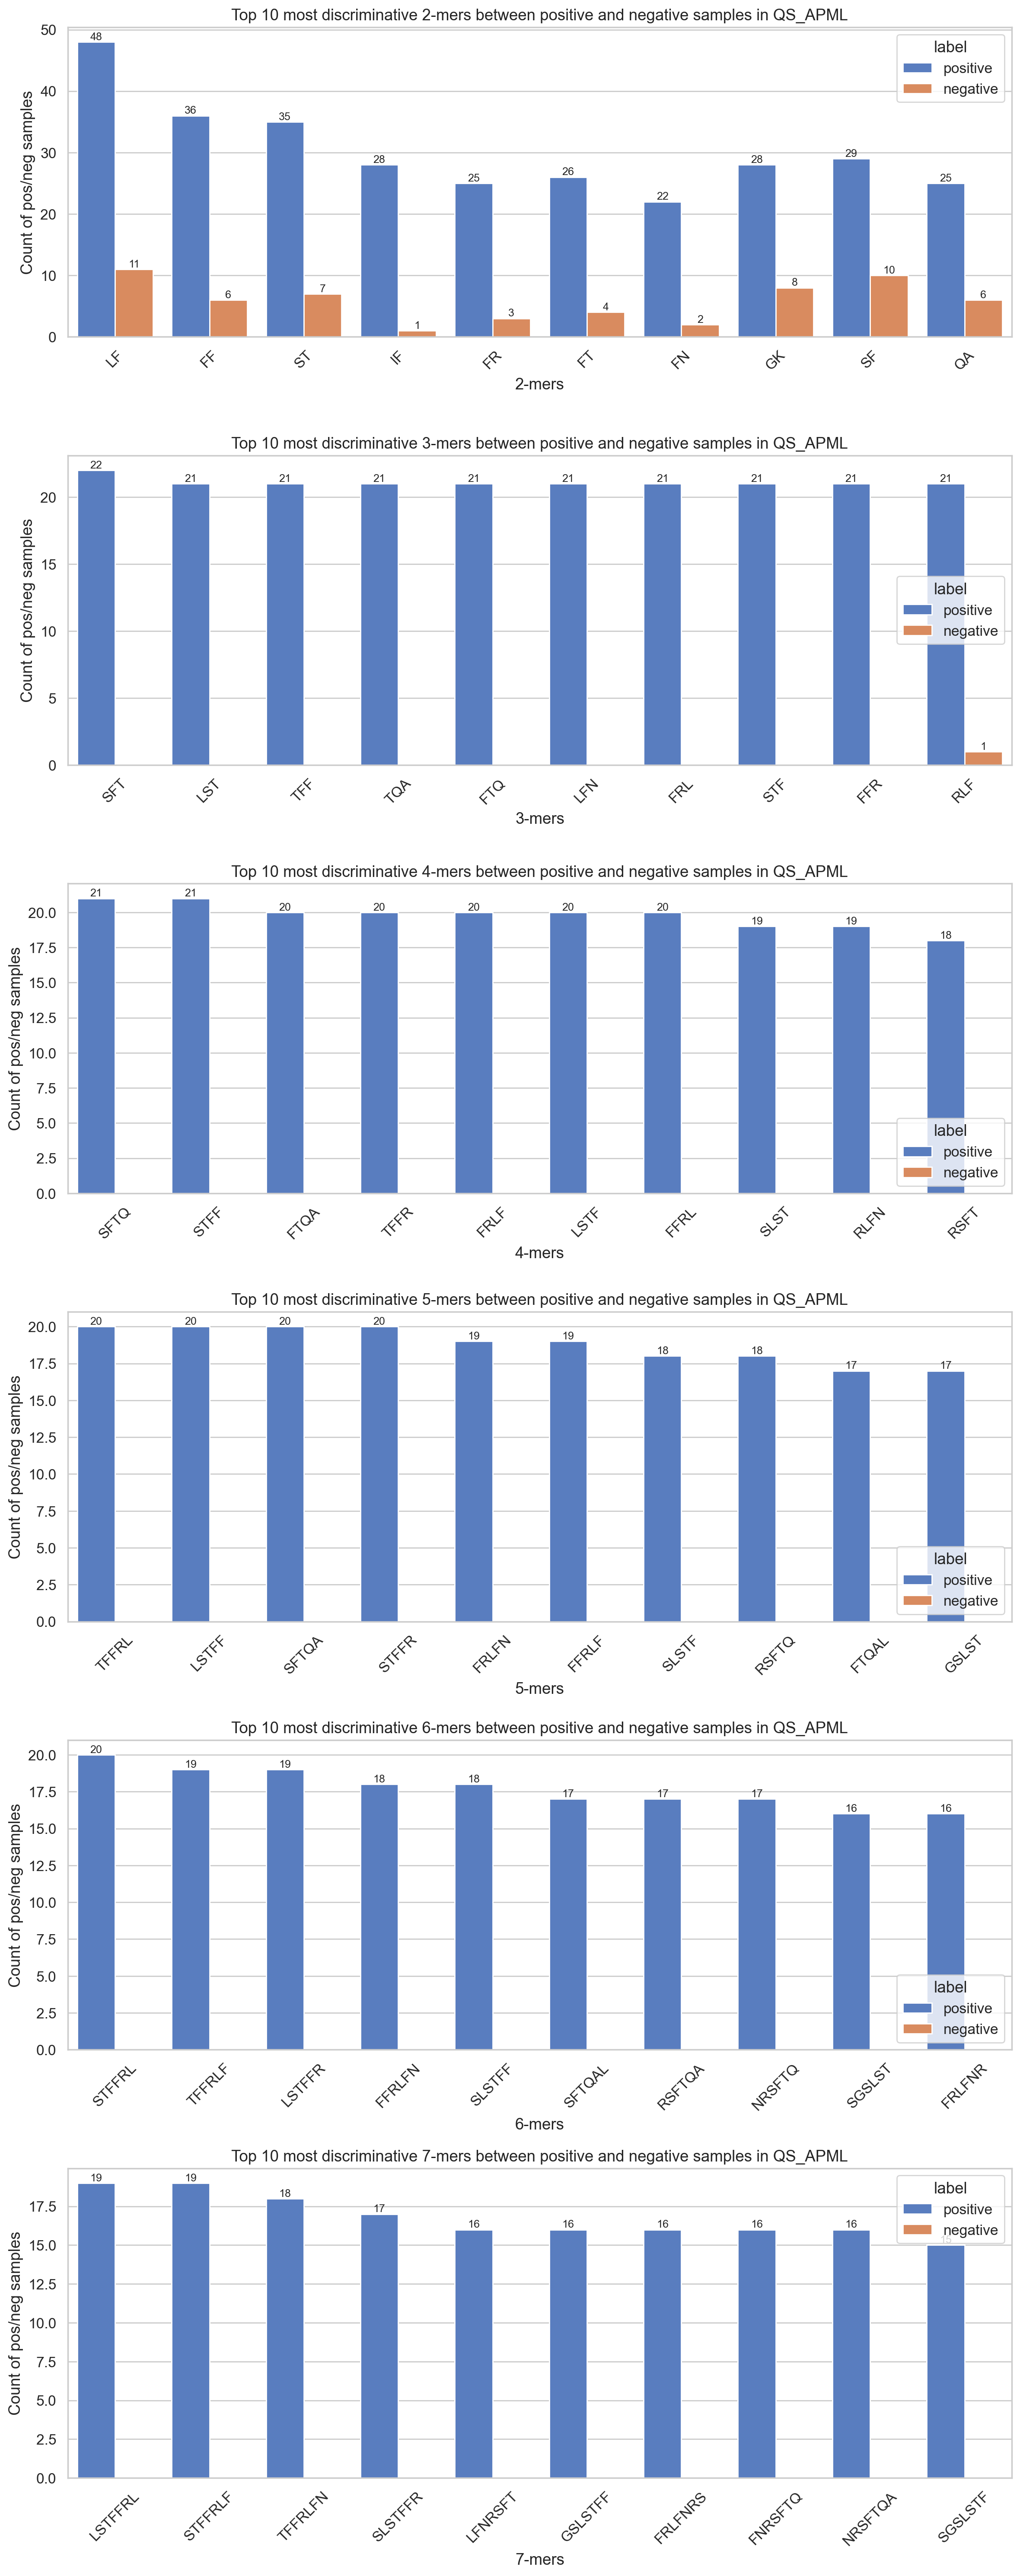

In [11]:
from pepbenchmark.visualization.distribution import plot_peptide_distribution
df = pd.DataFrame({"sequence":fasta, "label":label})
plot_peptide_distribution(df, dataset_name = "QS_APML", type = "binary_classification")

[2025-06-29 22:13:59,849][INFO][pepbenchmark] Feature fasta already loaded, skipping download
[2025-06-29 22:13:59,851][INFO][pepbenchmark] Feature label already loaded, skipping download


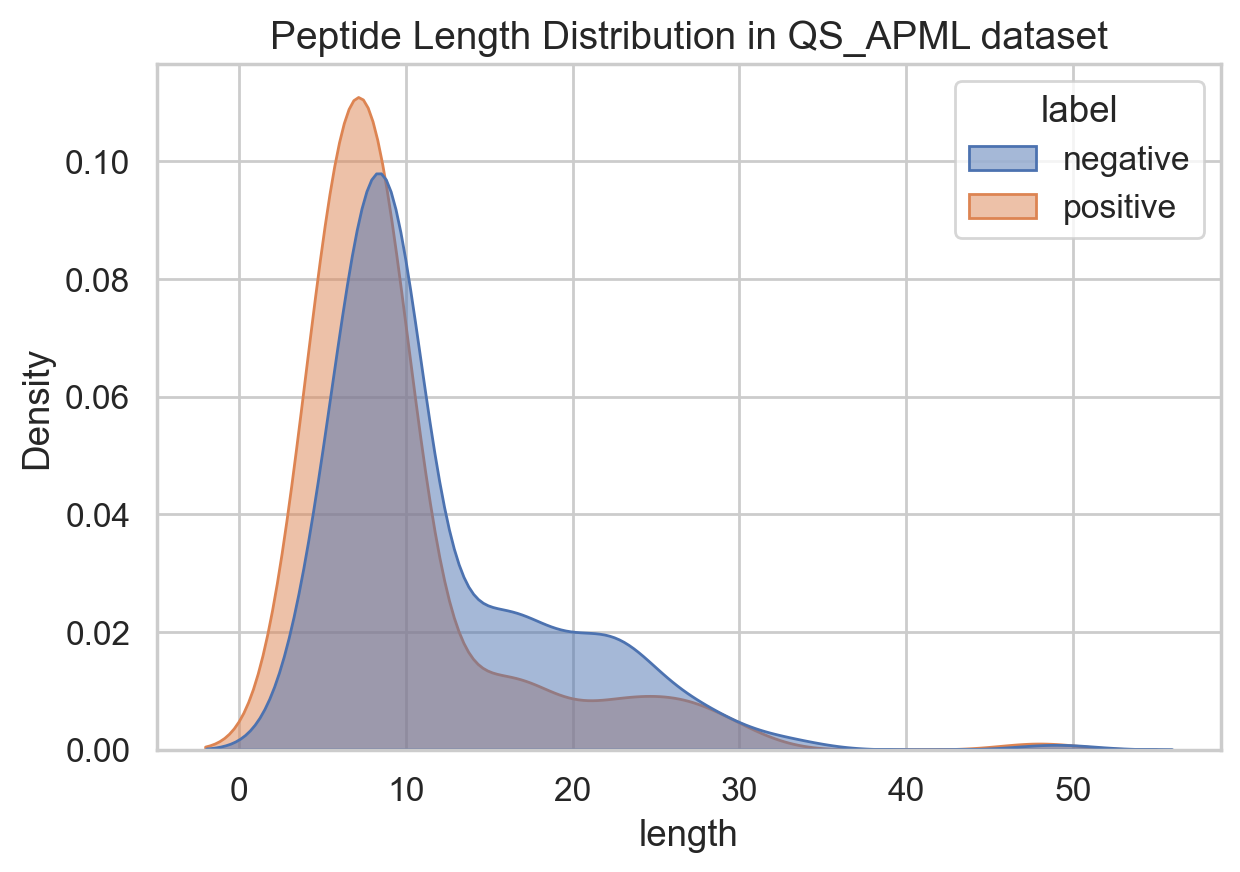

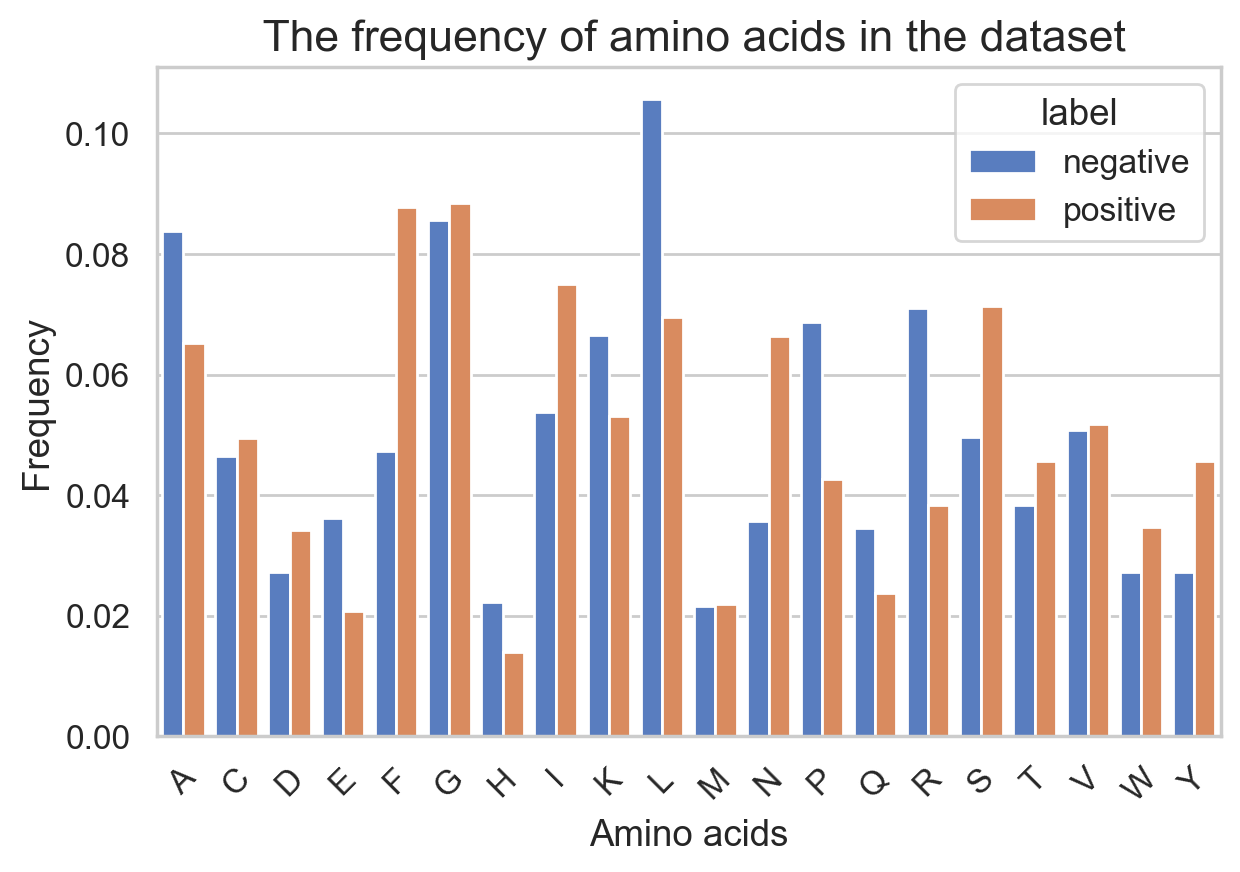

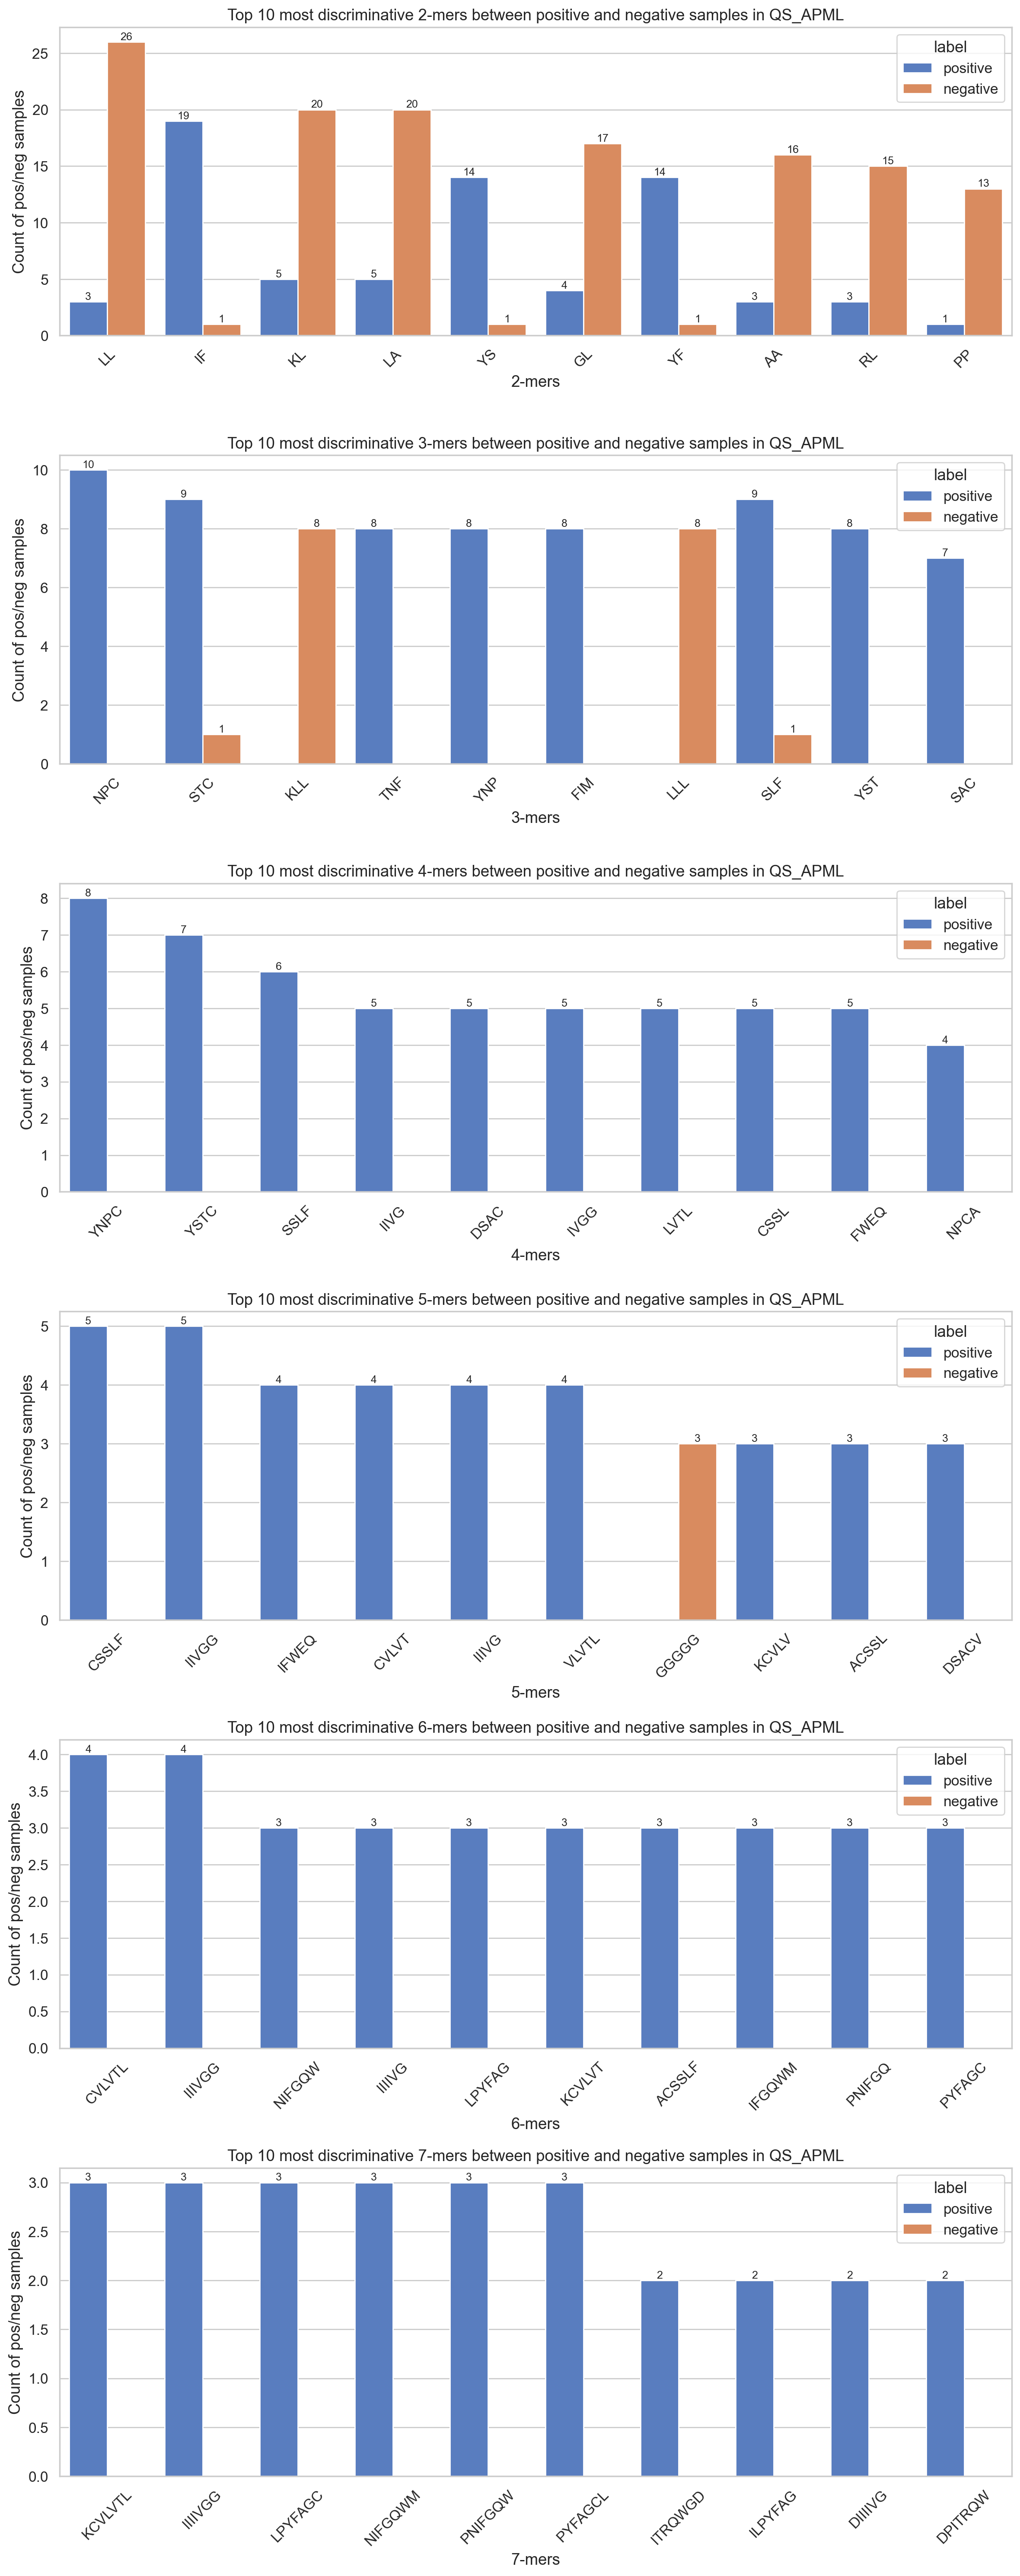

In [9]:
remain_fasta = dataset.get_official_feature("fasta")
remain_label = dataset.get_official_feature("label")
remain_df  = pd.DataFrame({"sequence":remain_fasta, "label":remain_label})
plot_peptide_distribution(remain_df, dataset_name = "QS_APML", type = "binary_classification")